In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import copy

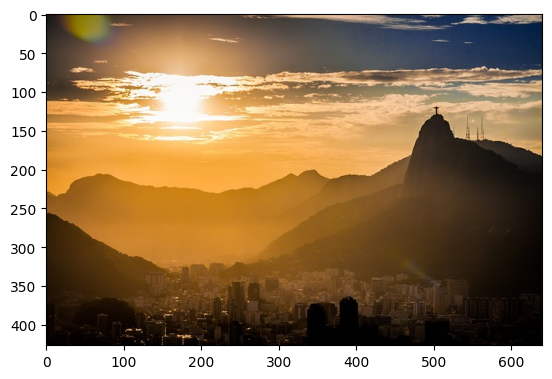

In [18]:
image = mpimg.imread("rio_de_janeiro.jpg")
x = copy.deepcopy(image)
plt.figure()
plt.imshow(x)
plt.show()

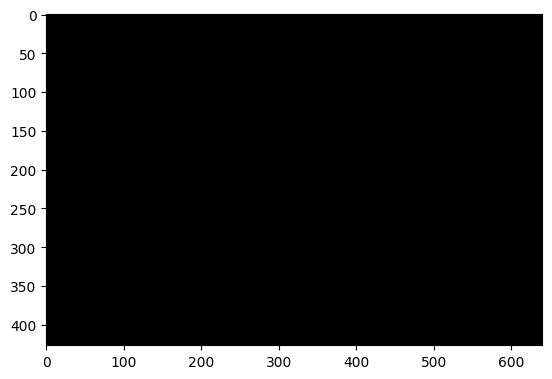

In [22]:
y = np.zeros_like(x)
plt.figure()
plt.imshow(y)
plt.show()

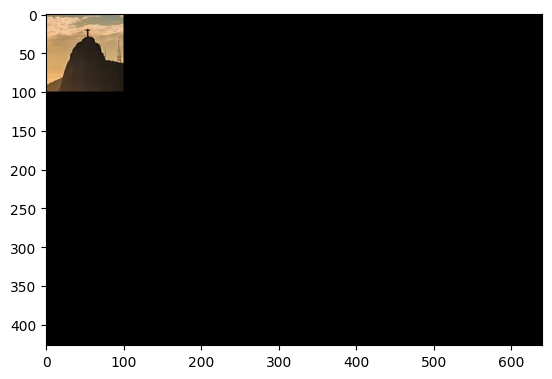

In [27]:
y[0:100, 0:100, :] = x [100:200, 450:550, :]
plt.figure()
plt.imshow(y)
plt.show()

In [36]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

P_origem = criar_indices(0, x.shape[0], 0, x.shape[1])
P_origem.shape

(2, 273280)

In [48]:
y = np.zeros_like(x)
A = np.array([ [2, 0], [0, 2] ])
P_destino = A @ P_origem

P_destino[0,:] = np.clip(P_destino[0,:], 0, x.shape[0]-1)
P_destino[1,:] = np.clip(P_destino[1,:], 0, x.shape[1]-1)
P_destino = P_destino.astype(int)

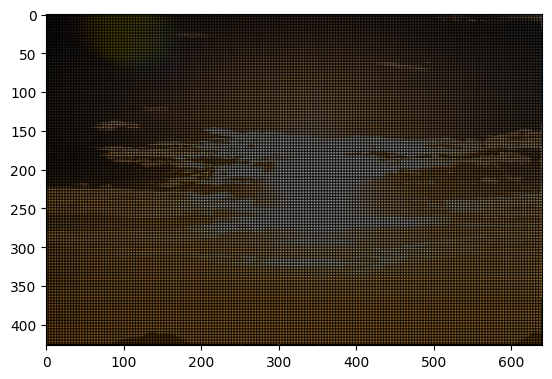

In [49]:

y[P_destino[0,:], P_destino[1,:], :] = x[P_origem[0,:], P_origem[1,:], :]
plt.figure()
plt.imshow(y)
plt.show()